# Car Prices Analysis
### Dataset: https://www.kaggle.com/datasets/asinow/car-price-dataset

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read file and print the dataset

In [139]:
df = pd.read_csv('car_price_dataset.csv')
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


### Check for missing values and duplicates

In [142]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [144]:
df.duplicated().sum()

0

### Use the IQR method to detect outliers

In [221]:
columns = ['Year', 'Engine_Size', 'Mileage','Price']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[columns] < lower_bound)| (df[columns] > upper_bound)).sum()
print(f'Outliers:\n{outliers}')

 

Outliers:
Year           0
Engine_Size    0
Mileage        0
Price          6
dtype: int64


In [223]:
df_cleaned = df[(df['Price'] >= lower_bound['Price']) & (df['Price'] <= upper_bound['Price'])]
df_cleaned

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


### Check correlation between columns

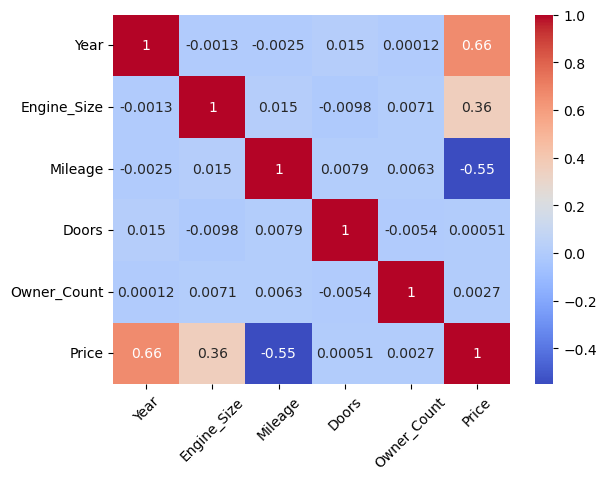

In [226]:
#Calculate correlation between columns
corr_matrix = df_cleaned.corr(numeric_only = True)
#Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

plt.xticks(rotation=45)
plt.show() #display heatmap

We notice that there is a high positive correlation between the `Year` of the car model and the `Price` and also between the `Engine_Size` and the `Price`, meaning that the newest the car and the biggest the engine the more expensive the car  
On the other hand we notice a negative correlation between the `Mileage` of the car and the `Price` meaning the highest the mileage the less expensive the car.

## Visualizations

### Create a scatter plot to show the relationship between Year and Price

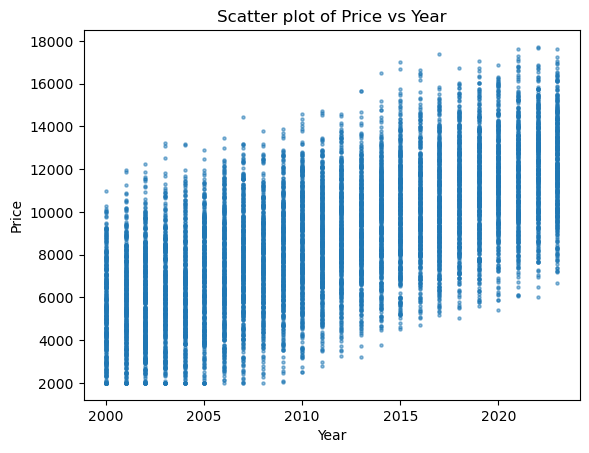

In [344]:
#Create scatter plot
plt.scatter(df_cleaned['Year'], df_cleaned['Price'], alpha=0.5, s = 5)

# Add titles and labels
plt.title('Scatter plot of Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

### Create a scatter plot to show the relationship between Mileage and Price

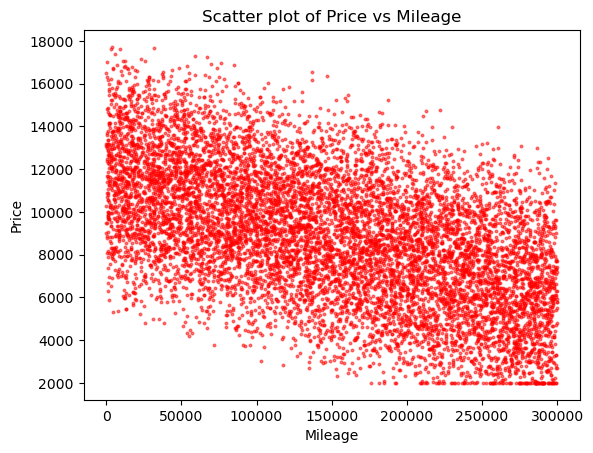

In [403]:
#Create scatter plot
plt.scatter(df_cleaned['Mileage'], df_cleaned['Price'],c = 'red',alpha=0.5, s= 3.5)


plt.title('Scatter plot of Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()

### Create barchart to show average price per year 

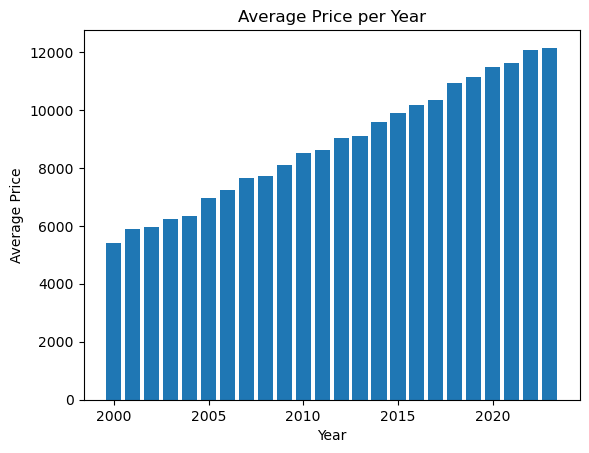

In [385]:
#Calculate the average price per car brand
average_price = df_cleaned.groupby('Year')['Price'].mean().reset_index()
#Create plot with avg prices
plt.bar(average_price['Year'], average_price['Price'])

plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

plt.show()

### Create barchart to show average price per year 

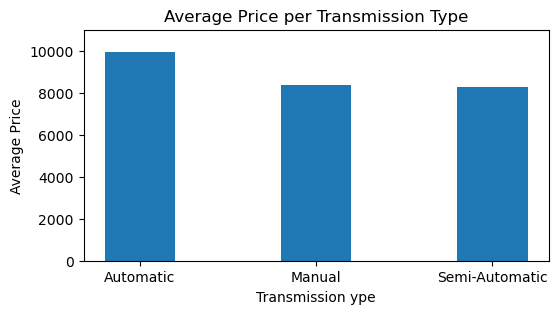

In [406]:
#Calculate the average price per transmission type
average_price_tr = df_cleaned.groupby('Transmission')['Price'].mean().reset_index()
#Create plot with avg prices
plt.figure(figsize=(6, 3))
plt.bar(average_price_tr['Transmission'], average_price_tr['Price'], width= 0.4)

plt.title('Average Price per Transmission Type')
plt.xlabel('Transmission ype')
plt.ylabel('Average Price')
plt.ylim(0,11000)

plt.show()

## Create a Price Predictive Model using Multiple Linear Regression  
We will use the columns `Year`, `Engine_Size`, `Mileage` as independent variables to predict the `Price` of a car.

In [408]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [410]:
#Define the independent variables
X = df_cleaned[['Year', 'Engine_Size','Mileage']]
#Define the dependent variable
y = df_cleaned['Price']

In [412]:
#Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [275]:
#Create linear regression model
model = LinearRegression()

#Fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [278]:
#Predict prices of test data
y_pred = model.predict(X_test)

#Check predictions
print("Predicted prices:", y_pred[:5])

Predicted prices: [ 2906.2225907   9929.83831002 13409.93132087  8607.5591195
  9896.03453665]


### Model evaluation

For the evaluaton of our model we will use the Mean Absolute Error (MAE), the Mean Squared Error (MSE) and the R² Score

In [280]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error: 888.98
Mean Squared Error: 1137718.10
R² Score: 0.88


### Prediction Example

In [415]:
# Create a new car object:
new_car = pd.DataFrame({
    'Year': [2021],
    'Engine_Size': [2.0],
    'Mileage': [15000]
})

#Predict the price of the car
predicted_price = model.predict(new_car)
print(f"Predicted price: {predicted_price[0]:.2f}$")


Predicted price: 13360.06$
